# Ejercicio de Exploración y Análisis

Se importan las librerías relevantes:

In [1]:
import pandas as pd
import random
import matplotlib
from global_variables import CSV_BOOK_DATA_CLEANED_PATH, CSV_BOOK_DATA_PATH
from global_variables import CSV_BOOK_RATING_CLEANED_PATH, CSV_BOOK_RATING_PATH

#from data_quality import prepare_book_data


## Limitar importacion de archivos al 1%

Debido al tamaño de los archivos, se selecciona aleatoriamente el 1% de los datos para iniciar el proceso de exploración y análisis.

In [2]:
#10% de los archivos
p = 0.1
df_books = pd.read_csv("C:/Users/DanielOcampo/Desktop/Trabajo Final/Datasets/books_data.csv", skiprows=lambda i: i>0 and random.random ()>p)
df_rating = pd.read_csv("C:/Users/DanielOcampo/Desktop/Trabajo Final/Datasets/books_rating.csv", skiprows=lambda i: i>0 and random.random ()>p)

In [3]:
print(df_books.shape)
print(df_rating.shape)
df_rating.head()

(21382, 10)
(300351, 10)


,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,0595344550,Whispers of the Wicked Saints,10.95,AUR0VA5H0C66C,"LoveToRead ""Actually Read Books""",1/2,1.0,1119225600,Buyer beware,"This is a self-published book, and if you want..."
1,0595344550,Whispers of the Wicked Saints,10.95,A2XXVRH6VJ8S7Q,S. Steinbach,8/8,5.0,1108339200,Couldn't put this book down!,Normally I'm not much into romance stories but...
2,0802841899,The Church of Christ: A Biblical Ecclesiology ...,25.97,ARI272XF8TOL4,Christopher J. Bray,74/81,5.0,955411200,Ecclesiological Milestone,With the publication of Everett Ferguson's boo...
3,0895554224,Saint Hyacinth of Poland,13.95,A1IVIK8YJRIQWU,"Nov 10 ""Tom""",2/2,4.0,945648000,A miracle on every page!,Who was Saint Hyacinth? The story starts with ...
4,1858683092,Mensa Number Puzzles (Mensa Word Games for Kids),NaN,NaN,NaN,1/1,4.0,1015718400,Numbers Puzzles Galore,This is a good book if you like numbers puzzle...


## Revisión inicial y limpieza archivo Books_data.csv

In [4]:
df_books.head()

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,The Overbury affair (Avon),NaN,['Miriam Allen De Ford'],NaN,http://books.google.nl/books?id=mHLTngEACAAJ&d...,NaN,1960,http://books.google.nl/books?id=mHLTngEACAAJ&d...,NaN,NaN
1,A husband for Kutani,"First published in 1938, this is a collection ...",['Frank Owen'],http://books.google.com/books/content?id=EzxOD...,http://books.google.nl/books?id=EzxODwAAQBAJ&p...,Pickle Partners Publishing,2018-02-27,https://play.google.com/store/books/details?id...,['History'],NaN
2,The Ultimate Guide to Law School Admission: In...,This collection brings together a distinguishe...,['Fiona Cownie'],http://books.google.com/books/content?id=KAjcB...,http://books.google.nl/books?id=KAjcBAAAQBAJ&p...,Bloomsbury Publishing,2010-01-28,https://play.google.com/store/books/details?id...,['Law'],NaN
3,Homer or Moses?: Early Christian Interpretatio...,NaN,['Arthur J. Droge'],http://books.google.com/books/content?id=R0A4H...,http://books.google.nl/books?id=R0A4HXqmb_8C&p...,Mohr Siebeck,1989,http://books.google.nl/books?id=R0A4HXqmb_8C&d...,['Religion'],NaN
4,Voices from the Farm: Adventures in Community ...,"Twenty-five years ago, at the height of the co...",['Rupert Fike'],http://books.google.com/books/content?id=IjTAB...,http://books.google.nl/books?id=IjTABgAAQBAJ&p...,Book Publishing Company,2012-08-21,https://play.google.com/store/books/details?id...,['Biography & Autobiography'],1.0


In [5]:
#Función Data Quality
def prepare_book_data(df: pd.DataFrame):
    if not isinstance(df, pd.DataFrame):
        raise TypeError("Se espera un objeto DataFrame de pandas")
    
    #Eliminar columnas que contienen links
    df_cleaned = pd.DataFrame(df)
    df_cleaned = df_cleaned.fillna('')
    columas_eliminar = ["image", "previewLink", "infoLink","ratingsCount"]
    df_cleaned=df_cleaned.drop(columns=columas_eliminar, axis=1)
    
    #Extaer año, convertir nulls en 0 y cambiar el tipo a integer
    df_cleaned['publishedDate'] = df_cleaned['publishedDate'].str.extract(r'(\d{4})')
    df_cleaned['publishedDate'] = df_cleaned['publishedDate'].fillna('0')
    df_cleaned['publishedDate']=df_cleaned['publishedDate'].astype(int)
    
    #Función para eliminar caracteres innecesarios
    def quitar_corchetes(valor):
        if isinstance(valor, str):
            return valor.strip("[]''")
        elif isinstance(valor, list):
            return [v.strip("''") for v in valor]
        else:
            return valor
            
    #Eliminación de caracteres para authors y categories
    df_cleaned['authors'] = df_cleaned['authors'].apply(quitar_corchetes)
    df_cleaned['categories'] = df_cleaned['categories'].apply(quitar_corchetes)
      
    return df_cleaned

def prepare_book_rating(df: pd.DataFrame):
    if not isinstance(df, pd.DataFrame):
        raise TypeError("Se espera un objeto DataFrame de pandas")
     #Eliminar columnas que contienen links
    df_rating_cleaned = pd.DataFrame(df)
    df_rating_cleaned = df_rating_cleaned.fillna('')
    columas_eliminar = ["Price", "review/helpfulness", "review/time","profileName"]
    df_rating_cleaned= df_rating_cleaned.drop(columns=columas_eliminar, axis=1)

    return df_rating_cleaned

In [6]:
df_books_clean = prepare_book_data(df_books)
print(df_books_clean.shape)
df_rating_clean = prepare_book_rating(df_rating)
print(df_rating_clean.shape)

(21382, 6)
(300351, 6)


In [7]:
df_books_clean.head()

,Title,description,authors,publisher,publishedDate,categories
0,The Overbury affair (Avon),,Miriam Allen De Ford,,1960,
1,A husband for Kutani,"First published in 1938, this is a collection ...",Frank Owen,Pickle Partners Publishing,2018,History
2,The Ultimate Guide to Law School Admission: In...,This collection brings together a distinguishe...,Fiona Cownie,Bloomsbury Publishing,2010,Law
3,Homer or Moses?: Early Christian Interpretatio...,,Arthur J. Droge,Mohr Siebeck,1989,Religion
4,Voices from the Farm: Adventures in Community ...,"Twenty-five years ago, at the height of the co...",Rupert Fike,Book Publishing Company,2012,Biography & Autobiography


In [8]:
df_rating_clean.head()

,Id,Title,User_id,review/score,review/summary,review/text
0,0595344550,Whispers of the Wicked Saints,AUR0VA5H0C66C,1.0,Buyer beware,"This is a self-published book, and if you want..."
1,0595344550,Whispers of the Wicked Saints,A2XXVRH6VJ8S7Q,5.0,Couldn't put this book down!,Normally I'm not much into romance stories but...
2,0802841899,The Church of Christ: A Biblical Ecclesiology ...,ARI272XF8TOL4,5.0,Ecclesiological Milestone,With the publication of Everett Ferguson's boo...
3,0895554224,Saint Hyacinth of Poland,A1IVIK8YJRIQWU,4.0,A miracle on every page!,Who was Saint Hyacinth? The story starts with ...
4,1858683092,Mensa Number Puzzles (Mensa Word Games for Kids),,4.0,Numbers Puzzles Galore,This is a good book if you like numbers puzzle...


### Se realiza un merge entre ambas bases de datos limpias para identificar los Reviews (Ratings) correspondientes a cada libro de la base Books_data

- en este caso, no hay un primary Key que nos permita hacer una conexión directa entre las tablas, por lo que deberemos utilizar el titulo (columna 'Title') de referencia para hacer la conexión.
- La tabla Ratings (books_ratings.csv) sera la tabla principal en la conexion y se utilizará books_data para traer los detalles de cada libro reseñado
- Se incluye un segundo proceso de limpieza para asegurarnos de tener la información relevante para el cliente: Reseñas por autor, editorial y/o categorias

In [9]:
df_books_full = df_rating_clean.merge(df_books_clean, on='Title', how='left')
df_books_full.head()


,Id,Title,User_id,review/score,review/summary,review/text,description,authors,publisher,publishedDate,categories
0,0595344550,Whispers of the Wicked Saints,AUR0VA5H0C66C,1.0,Buyer beware,"This is a self-published book, and if you want...",NaN,NaN,NaN,NaN,NaN
1,0595344550,Whispers of the Wicked Saints,A2XXVRH6VJ8S7Q,5.0,Couldn't put this book down!,Normally I'm not much into romance stories but...,NaN,NaN,NaN,NaN,NaN
2,0802841899,The Church of Christ: A Biblical Ecclesiology ...,ARI272XF8TOL4,5.0,Ecclesiological Milestone,With the publication of Everett Ferguson's boo...,NaN,NaN,NaN,NaN,NaN
3,0895554224,Saint Hyacinth of Poland,A1IVIK8YJRIQWU,4.0,A miracle on every page!,Who was Saint Hyacinth? The story starts with ...,NaN,NaN,NaN,NaN,NaN
4,1858683092,Mensa Number Puzzles (Mensa Word Games for Kids),,4.0,Numbers Puzzles Galore,This is a good book if you like numbers puzzle...,NaN,NaN,NaN,NaN,NaN


In [10]:
#Función Data Quality
def prepare_fullbook_data(df: pd.DataFrame):
    if not isinstance(df, pd.DataFrame):
        raise TypeError("Se espera un objeto DataFrame de pandas")
    
    #Eliminar columnas que contienen links
    df_cleaned = pd.DataFrame(df)
    df_cleaned = df_cleaned.fillna('')
    df_cleaned = df_cleaned[
        (df_cleaned['publisher'] != '') |
        (df_cleaned['authors'] != '') |
        (df_books_full['categories'] != '') ]
   
      
    return df_cleaned

In [11]:
df_books_full = prepare_fullbook_data(df_books_full)
df_books_full.shape
df_books_full.head()

,Id,Title,User_id,review/score,review/summary,review/text,description,authors,publisher,publishedDate,categories
0,0595344550,Whispers of the Wicked Saints,AUR0VA5H0C66C,1.0,Buyer beware,"This is a self-published book, and if you want...",,,,,
1,0595344550,Whispers of the Wicked Saints,A2XXVRH6VJ8S7Q,5.0,Couldn't put this book down!,Normally I'm not much into romance stories but...,,,,,
2,0802841899,The Church of Christ: A Biblical Ecclesiology ...,ARI272XF8TOL4,5.0,Ecclesiological Milestone,With the publication of Everett Ferguson's boo...,,,,,
3,0895554224,Saint Hyacinth of Poland,A1IVIK8YJRIQWU,4.0,A miracle on every page!,Who was Saint Hyacinth? The story starts with ...,,,,,
4,1858683092,Mensa Number Puzzles (Mensa Word Games for Kids),,4.0,Numbers Puzzles Galore,This is a good book if you like numbers puzzle...,,,,,


## Exploración de base de datos agrupada (df_books_full)

### Conteo de General

In [12]:
Data_count = df_books_full.nunique().reset_index()
Data_count.columns = ['Variable', 'Frequency']
Data_count

,Variable,Frequency
0,Id,80878
1,Title,77591
2,User_id,171685
3,review/score,5
4,review/summary,228728
5,review/text,272839
6,description,5857
7,authors,6422
8,publisher,2045
9,publishedDate,173


### Frecuencia Autores

- Se calcula el numero de reseñas por autor. 
- Es necesario filtrar los valores nulos del dataset en esta columna ('Authors')

In [13]:
author_name = ""
filtered_authors = df_books_full[df_books_full['authors'] != author_name]
print(filtered_authors.shape)
filtered_authors.head()

(23353, 11)


,Id,Title,User_id,review/score,review/summary,review/text,description,authors,publisher,publishedDate,categories
6,0974289108,The Ultimate Guide to Law School Admission: In...,A1KZ0RDJZQSY4O,3.0,No &quot;Insider&quot; Secrets,If you are someone who is fairly new to the la...,This collection brings together a distinguishe...,Fiona Cownie,Bloomsbury Publishing,2010.0,Law
7,0974289108,The Ultimate Guide to Law School Admission: In...,,5.0,Exactly what I needed.,This book answered all my questions about gett...,This collection brings together a distinguishe...,Fiona Cownie,Bloomsbury Publishing,2010.0,Law
16,3161453549,Homer or Moses?: Early Christian Interpretatio...,A15VL8XO8POFCI,5.0,A classic,Required reading for anyone interested in the ...,,Arthur J. Droge,Mohr Siebeck,1989.0,Religion
17,157067051X,Voices from the Farm: Adventures in Community ...,A1HE0OMWF7ZZPH,5.0,LOVE The Farm!,Brought back warm memories of my brief stay at...,"Twenty-five years ago, at the height of the co...",Rupert Fike,Book Publishing Company,2012.0,Biography & Autobiography
18,157067051X,Voices from the Farm: Adventures in Community ...,A16HXVNPU5TCGE,5.0,Good book,Well written chronicles of The Farm from the p...,"Twenty-five years ago, at the height of the co...",Rupert Fike,Book Publishing Company,2012.0,Biography & Autobiography


In [14]:
author_counts = filtered_authors['authors'].value_counts().reset_index()
author_counts.columns = ['Author', 'Frequency']
author_counts.sort_values(by='Frequency', ascending=False)
author_counts.head()

,Author,Frequency
0,Charlotte Brontë,322
1,George Clason,223
2,Robert Louis Stevenson,221
3,Adam Smith,213
4,John Steinbeck,196


In [15]:
#20 autores con más publicaciones
frecuency_authors = filtered_authors[['authors']].value_counts().head(20)
frecuency_authors

authors                
Charlotte Brontë           322
George Clason              223
Robert Louis Stevenson     221
Adam Smith                 213
John Steinbeck             196
S. E. Hinton               179
Christopher Paolini        154
Robert Jordan              154
Rey Terciero               150
Gillian Fenwick            148
Kurt Vonnegut              146
John Irving                130
Lauren Weisberger          127
Philippa Gregory           111
Jane Austen                109
Frances Hodgson Burnett    109
Richard Adams              107
Gary Chapman               104
J. D. Robb                 104
Nikki Van De Car           101
dtype: int64

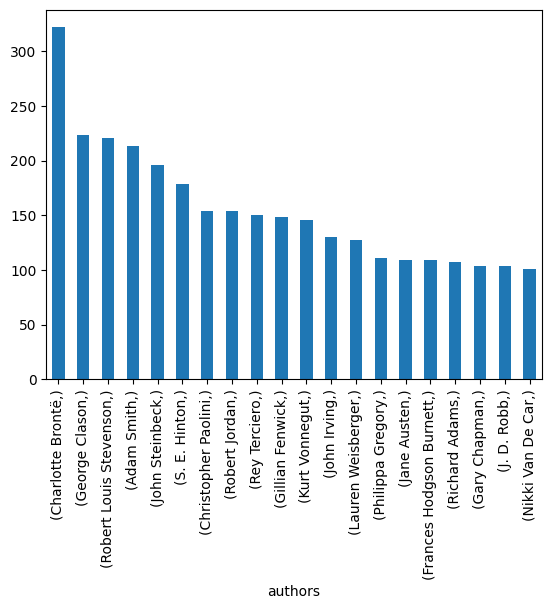

In [16]:
ax = frecuency_authors.plot.bar(column = ['authors'])


In [17]:
Most_review_aut = author_counts.iloc[0,0]
reviews_aut = author_counts.iloc[0,1]
print(F"El autor con mayor numero de reseñas es {Most_review_aut} con {reviews_aut} reseñas")

El autor con mayor numero de reseñas es Charlotte Brontë con 322 reseñas


### Frecuencia Categorias

- Se calcula la frecuencia de reseñas por categoria
- se filtran las categorías nulas

In [18]:
Category_name = ""
filtered_categories = df_books_full[df_books_full['categories'] != Category_name]
print(filtered_categories.shape)
filtered_categories.head()

(21865, 11)


,Id,Title,User_id,review/score,review/summary,review/text,description,authors,publisher,publishedDate,categories
6,0974289108,The Ultimate Guide to Law School Admission: In...,A1KZ0RDJZQSY4O,3.0,No &quot;Insider&quot; Secrets,If you are someone who is fairly new to the la...,This collection brings together a distinguishe...,Fiona Cownie,Bloomsbury Publishing,2010.0,Law
7,0974289108,The Ultimate Guide to Law School Admission: In...,,5.0,Exactly what I needed.,This book answered all my questions about gett...,This collection brings together a distinguishe...,Fiona Cownie,Bloomsbury Publishing,2010.0,Law
16,3161453549,Homer or Moses?: Early Christian Interpretatio...,A15VL8XO8POFCI,5.0,A classic,Required reading for anyone interested in the ...,,Arthur J. Droge,Mohr Siebeck,1989.0,Religion
17,157067051X,Voices from the Farm: Adventures in Community ...,A1HE0OMWF7ZZPH,5.0,LOVE The Farm!,Brought back warm memories of my brief stay at...,"Twenty-five years ago, at the height of the co...",Rupert Fike,Book Publishing Company,2012.0,Biography & Autobiography
18,157067051X,Voices from the Farm: Adventures in Community ...,A16HXVNPU5TCGE,5.0,Good book,Well written chronicles of The Farm from the p...,"Twenty-five years ago, at the height of the co...",Rupert Fike,Book Publishing Company,2012.0,Biography & Autobiography


In [19]:
Category_counts = filtered_categories['categories'].value_counts().reset_index()
Category_counts.columns = ['Category', 'Frequency']
Category_counts.sort_values(by='Frequency', ascending=False)
Category_counts.head()

,Category,Frequency
0,Fiction,6593
1,Juvenile Fiction,1535
2,Biography & Autobiography,1423
3,Religion,851
4,History,816


In [20]:
#20 categorias con más publicaciones
frecuency_category = filtered_categories['categories'].value_counts().head(20)
frecuency_category

Fiction                      6593
Juvenile Fiction             1535
Biography & Autobiography    1423
Religion                      851
History                       816
Business & Economics          577
Computers                     503
Literary Criticism            400
Cooking                       381
Social Science                364
Juvenile Nonfiction           344
Family & Relationships        329
Sports & Recreation           296
Body, Mind & Spirit           288
Psychology                    266
Self-Help                     266
Science                       255
Political Science             238
Capitalism                    213
Nature                        175
Name: categories, dtype: int64

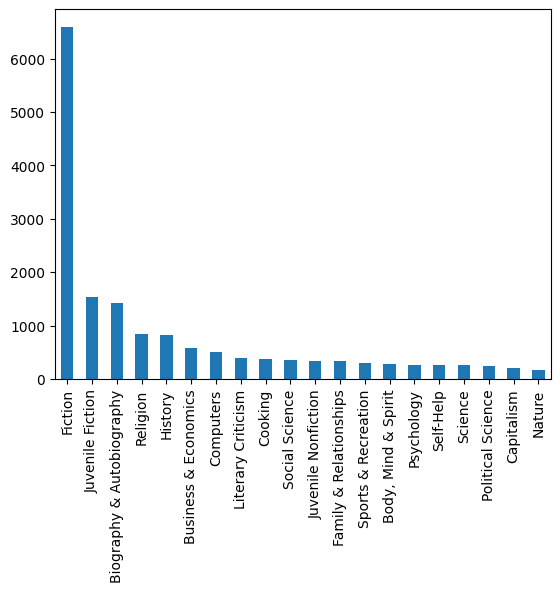

In [21]:
ax = frecuency_category.plot.bar(column = ['categories'])


In [22]:
Most_reviewed_cats = Category_counts.iloc[0,0]
Reviewed_cats = Category_counts.iloc[0,1]
print(F"La categoria con más publicaciones es {Most_reviewed_cats} con {Reviewed_cats} libros")

La categoria con más publicaciones es Fiction con 6593 libros


## Análisis de competencia (Editoriales)

Se hará un analisis más profundo al comportamiento de las reseñas para las 5 editoriales con mayor número de reseñas.

In [23]:
Publisher_name = ""
filtered_publishers = df_books_full[df_books_full['publisher'] != Publisher_name]
print(filtered_publishers.shape)
filtered_publishers.head()

(19571, 11)


,Id,Title,User_id,review/score,review/summary,review/text,description,authors,publisher,publishedDate,categories
6,0974289108,The Ultimate Guide to Law School Admission: In...,A1KZ0RDJZQSY4O,3.0,No &quot;Insider&quot; Secrets,If you are someone who is fairly new to the la...,This collection brings together a distinguishe...,Fiona Cownie,Bloomsbury Publishing,2010.0,Law
7,0974289108,The Ultimate Guide to Law School Admission: In...,,5.0,Exactly what I needed.,This book answered all my questions about gett...,This collection brings together a distinguishe...,Fiona Cownie,Bloomsbury Publishing,2010.0,Law
16,3161453549,Homer or Moses?: Early Christian Interpretatio...,A15VL8XO8POFCI,5.0,A classic,Required reading for anyone interested in the ...,,Arthur J. Droge,Mohr Siebeck,1989.0,Religion
17,157067051X,Voices from the Farm: Adventures in Community ...,A1HE0OMWF7ZZPH,5.0,LOVE The Farm!,Brought back warm memories of my brief stay at...,"Twenty-five years ago, at the height of the co...",Rupert Fike,Book Publishing Company,2012.0,Biography & Autobiography
18,157067051X,Voices from the Farm: Adventures in Community ...,A16HXVNPU5TCGE,5.0,Good book,Well written chronicles of The Farm from the p...,"Twenty-five years ago, at the height of the co...",Rupert Fike,Book Publishing Company,2012.0,Biography & Autobiography


In [24]:
Publisher_count = filtered_publishers['publisher'].value_counts().reset_index()
Publisher_count.columns = ['Publisher', 'Frequency']
Publisher_count.sort_values(by='Frequency', ascending=False)
Publisher_count.head()

,Publisher,Frequency
0,Penguin,1461
1,Simon and Schuster,1029
2,Harper Collins,661
3,Random House,546
4,Vintage,353


In [25]:
#20 categorias con más publicaciones
frecuency_publisher = filtered_publishers['publisher'].value_counts().head(20)
frecuency_publisher

Penguin                                          1461
Simon and Schuster                               1029
Harper Collins                                    661
Random House                                      546
Vintage                                           353
John Wiley & Sons                                 266
Open Road Media                                   243
Createspace Independent Publishing Platform       239
Macmillan                                         234
Bantam Classics                                   232
Penguin UK                                        222
London : Printed for W. Strahan and T. Cadell     213
Ballantine Books                                  188
Little, Brown Books for Young Readers             177
Knopf Books for Young Readers                     166
Tor Books                                         165
Anchor                                            161
Houghton Mifflin Harcourt                         150
Oak Knoll Press             

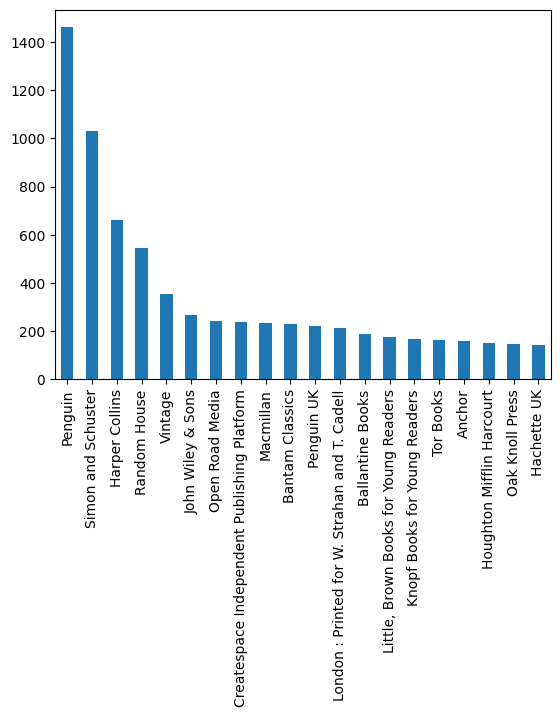

In [26]:
ax = frecuency_publisher.plot.bar(column = ['publisher'])


In [27]:
Top_publisher = Publisher_count.iloc[0,0]
second_top = Publisher_count.iloc[1,0]
third_top = Publisher_count.iloc[2,0]
fourth_top = Publisher_count.iloc[3,0]
fifth_top = Publisher_count.iloc[4,0]
Publish_count = Publisher_count.iloc[0,1]
second_count = Publisher_count.iloc[1,1]
third_count = Publisher_count.iloc[2,1]
fourth_count = Publisher_count.iloc[3,1]
fifth_count = Publisher_count.iloc[4,1]
print(F"""Las editoriales con mayor número de reseñas son '{Top_publisher}' ({Publish_count} reseñas), 
'{second_top}' ({second_count} reseñas), '{third_top}' ({third_count} reseñas), 
'{fourth_top}' ({fourth_count} reseñas) y '{fifth_top}' ({fifth_count} reseñas). 
Estas serán nuestro punto de referencia para el análisis de aquí en adelante.""")

Las editoriales con mayor número de reseñas son 'Penguin' (1461 reseñas), 
'Simon and Schuster' (1029 reseñas), 'Harper Collins' (661 reseñas), 
'Random House' (546 reseñas) y 'Vintage' (353 reseñas). 
Estas serán nuestro punto de referencia para el análisis de aquí en adelante.


In [28]:

top_publishers = df_books_full[
    (df_books_full['publisher'] == Top_publisher) |
    (df_books_full['publisher'] == second_top) |
    (df_books_full['publisher'] == third_top) |
    (df_books_full['publisher'] == fourth_top) |
    (df_books_full['publisher'] == fifth_top) ]
print(top_publishers.shape)
top_publishers.head()

(4050, 11)


,Id,Title,User_id,review/score,review/summary,review/text,description,authors,publisher,publishedDate,categories
1098,B000KEPC7M,Helter Skelter,A3TGWTGKJ3EH6S,5.0,Horrifyingly Accurate,I am 13 and have read Helter Skelter for the f...,THE BEST-SELLING TRUE CRIME BOOK IN HISTORY __...,"Vincent Bugliosi', 'Curt Gentry",Random House,2014.0,True Crime
1099,B000KEPC7M,Helter Skelter,,5.0,It &quot;scared the hell out of me&quot; all f...,I've read Helter Skelter four times now and ev...,THE BEST-SELLING TRUE CRIME BOOK IN HISTORY __...,"Vincent Bugliosi', 'Curt Gentry",Random House,2014.0,True Crime
1100,B000KEPC7M,Helter Skelter,A291FZSIKA1TT0,5.0,MANSON'S EVIL ..,... polluted what was good about the peace-lov...,THE BEST-SELLING TRUE CRIME BOOK IN HISTORY __...,"Vincent Bugliosi', 'Curt Gentry",Random House,2014.0,True Crime
1101,B000KEPC7M,Helter Skelter,A1FY75LMP6LLHA,5.0,Can't Be Beat,"Though this book was written decades ago, it h...",THE BEST-SELLING TRUE CRIME BOOK IN HISTORY __...,"Vincent Bugliosi', 'Curt Gentry",Random House,2014.0,True Crime
1102,B000KEPC7M,Helter Skelter,,5.0,This book will have you sleeping with the ligh...,One of the best true crime books ever written....,THE BEST-SELLING TRUE CRIME BOOK IN HISTORY __...,"Vincent Bugliosi', 'Curt Gentry",Random House,2014.0,True Crime


### Analisis de Sentimiento en las reseñas de las 5 editoriales seleccionadas

In [29]:
# Sentimiento Comentarios
good_indices = top_publishers["review/score"] > 3.1
good_reviews = top_publishers[good_indices]
bad_indices = top_publishers["review/score"] < 2.1
bad_reviews = top_publishers[bad_indices]

#### Comentarios Positivos

In [38]:
author_counts = good_reviews['authors'].value_counts().reset_index()
author_counts.columns = ['authors', 'Frequency']
author_counts = author_counts.sort_values(by='Frequency', ascending=False)
author_rating = good_reviews.groupby('authors')['review/score'].mean().reset_index()
author_rating = author_counts.merge(author_rating, on='authors', how='right')
author_rating.columns = ['Author', 'Frequency', 'Average Rating']
author_rating.sort_values(by='Frequency', ascending=False, inplace=True)
author_rating.head()

,Author,Frequency,Average Rating
432,S. E. Hinton,166,4.789157
234,John Irving,104,4.817308
239,John Steinbeck,94,4.734043
185,J. D. Robb,81,4.716049
363,Nathaniel Philbrick,79,4.734177


In [49]:
category_counts = good_reviews[(good_reviews['categories'] != '')]
category_counts = category_counts['categories'].value_counts().reset_index()
category_counts.columns = ['categories', 'Frequency']


In [50]:
category_rating = good_reviews.groupby('categories')['review/score'].mean().reset_index()
category_rating = category_counts.merge(category_rating, on='categories', how='right')
category_rating.columns = ['Category', 'Frequency', 'Rating']
category_rating.sort_values(by='Frequency', ascending=False)
category_rating.head()

,Category,Frequency,Rating
0,,NaN,4.000000
1,Abortion,4.0,4.750000
2,Amish,1.0,4.000000
3,Art,3.0,5.000000
4,Biography & Autobiography,246.0,4.756098
